### Problem statement

Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- This dataset has 1599 rows and 12 columns with both continuous data and categorical discrete non-continuous data.
- Out of 12 columns we have 11 features and 1 target variable(quality) with non-continuous values
- It is a classification model we need to predict quality of wine(7 or higher getting classified as 'good/1' and the remainder as 'not good/0')

In [4]:
df.shape

(1599, 12)

The data has 1599 rows and 12 columns

In [5]:
# Checking nunique values for df

columns_to_check = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

for column_name in columns_to_check:
    unique_values = df[column_name].nunique()
    print(f"Column: {column_name}, Number of Unique Values: {unique_values}\n")

Column: fixed acidity, Number of Unique Values: 96

Column: volatile acidity, Number of Unique Values: 143

Column: citric acid, Number of Unique Values: 80

Column: residual sugar, Number of Unique Values: 91

Column: chlorides, Number of Unique Values: 153

Column: free sulfur dioxide, Number of Unique Values: 60

Column: total sulfur dioxide, Number of Unique Values: 144

Column: density, Number of Unique Values: 436

Column: pH, Number of Unique Values: 89

Column: sulphates, Number of Unique Values: 96

Column: alcohol, Number of Unique Values: 65

Column: quality, Number of Unique Values: 6



In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

We have 6 unique values with frequency of each unique value, so it come under multiclass classification problem with six discrete categories

### Exploratory Data Analysis

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the columns have 1599 datapoints, so no nulls
only quality varaible is int dtype and reset of the independent variable are float dtype


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset has no null values

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We have two data types float and int present in data set

In [12]:
df.isnull().sum().sum()

0

There are no missing values present in the data

In [13]:
# Lets check the value counts for each column

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [14]:
blank_spaces = df[df == ' '].sum()
blank_spaces

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

from the observations we can say that there are no blank spaces or null values in the dataset

In [15]:
# Checking number of unique values in each column
df.nunique().to_frame('No: of unique values')

,No: of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


These are the unique values present in the dataset

### Descriptive Analysis

In [16]:
# Statistical summary of the data

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the statistical information of the data set.
There are no negatives values in the dataset

The count is 1599 in all columns so no missing values or null values inthe datset

The mean value is slightly greater in fixed acidity,free sulfur dioxide, total sulfur dioxide may be data is right skewed

We can observe huge difference in 75% and max in free sulfur dioxide,	total sulfur dioxidehence may be a chance of outliers


### EDA  Univariate Analysis

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

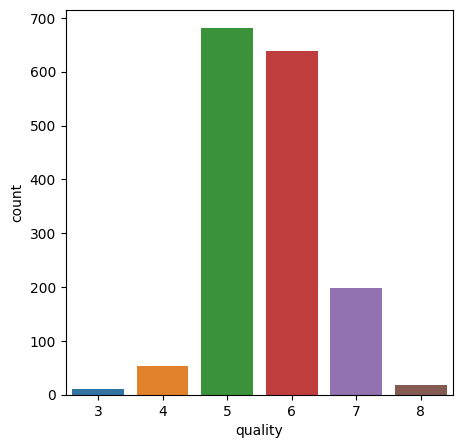

In [17]:
# no: of values for each quality of wine
plt.figure(figsize=(5,5))
sns.countplot(x = 'quality',data =df)

df['quality'].value_counts()

the frequency of a quality rating of 5 is higher, then followed by 6 than other ratings.

### Bivariate analysis

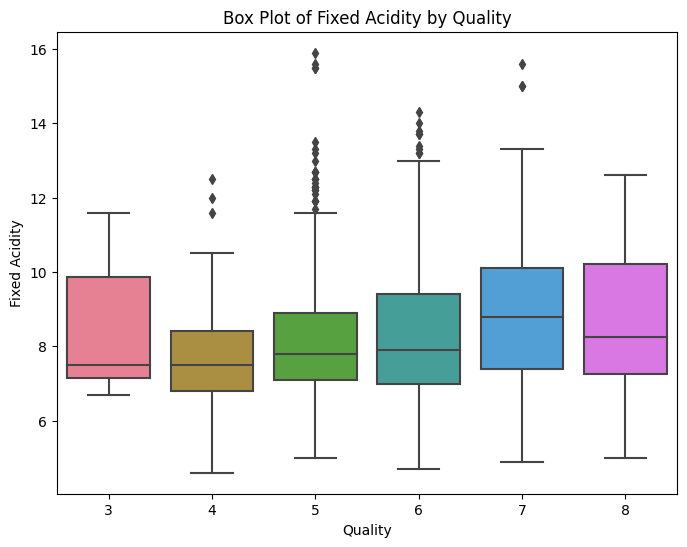

In [18]:
plt.figure(figsize=(8, 6))  # Set the figure size

sns.boxplot(x='quality', y='fixed acidity', data=df, palette='husl')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Box Plot of Fixed Acidity by Quality')
plt.show()

the relation ship is less strong between fixed acidity and quality as it is clearly undefined.

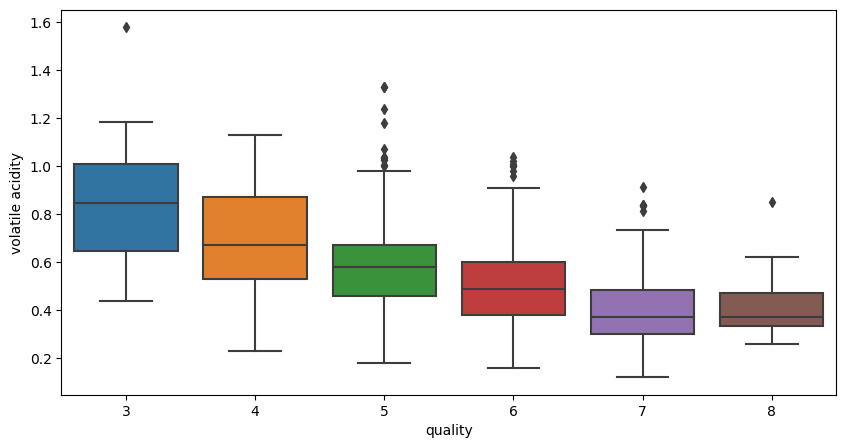

In [19]:
# volatile acidity Vs quality

plt.figure(figsize=(10,5))
sns.boxplot(x = 'quality', y = 'volatile acidity', data =df)
plt.show()

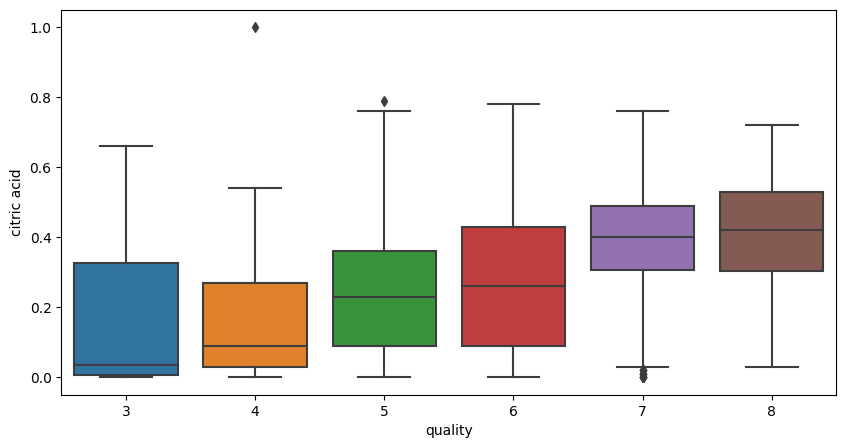

In [20]:
# citric acid Vs quality

plt.figure(figsize=(10,5))
sns.boxplot(x = 'quality', y = 'citric acid', data =df)
plt.show()

High citric acid content the higher is the quality, as citirc acid is directly proportional to quality

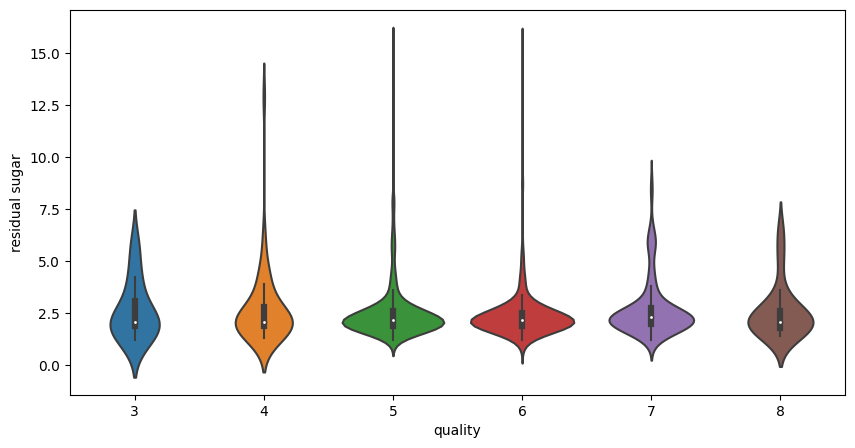

In [21]:
# residual sugar Vs quality

plt.figure(figsize=(10,5))
sns.violinplot(x = 'quality', y = 'residual sugar', data =df)
plt.show()

Residual sugars and wine quality has no significant relation, there is no positive or negative trend

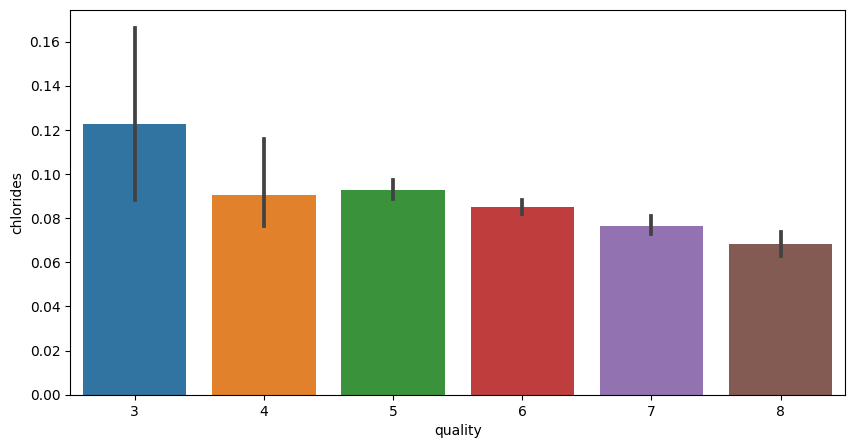

In [22]:
# chlorides Vs quality

plt.figure(figsize=(10,5))
sns.barplot(x = 'quality', y = 'chlorides', data =df)
plt.show()

As the chlorides increases the wine quality decreases, so they are negatively related, the trend is falling down as quality is increasing

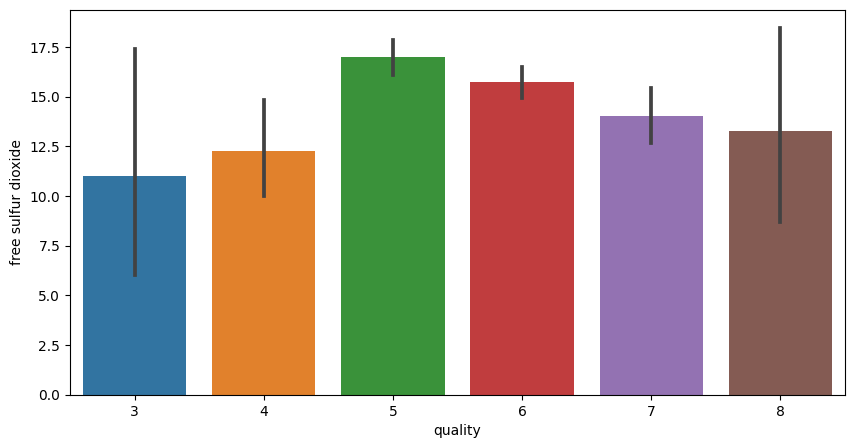

In [23]:
# free sulfur dioxide Vs quality

plt.figure(figsize=(10,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data =df)
plt.show()

The relation appears to be weak between quality and free sulphur oxides, showing inconsistent trends

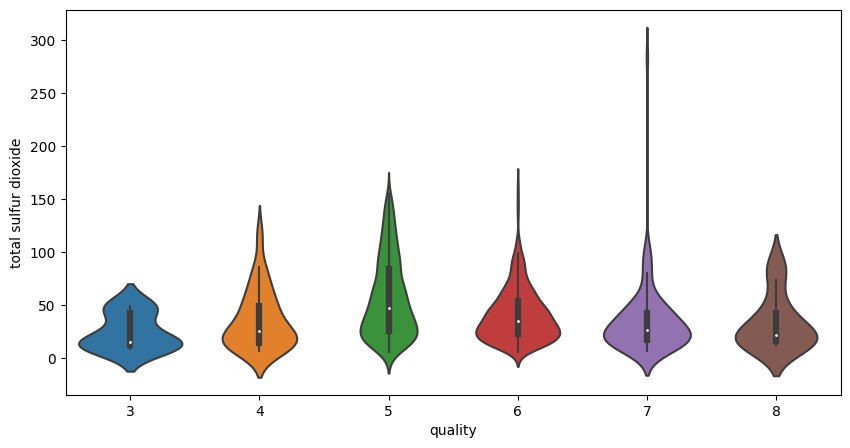

In [24]:
# total sulfur dioxide Vs quality

plt.figure(figsize=(10,5))
sns.violinplot(x = 'quality', y = 'total sulfur dioxide', data =df)
plt.show()

The relation appears to be weak between quality and total sulphur dioxide, showing inconsistent trends

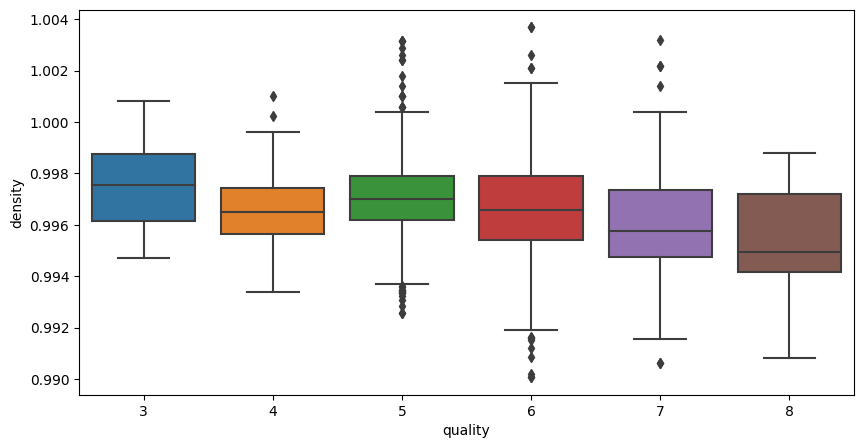

In [25]:
# density Vs quality

plt.figure(figsize=(10,5))
sns.boxplot(x = 'quality', y = 'density', data =df)
plt.show()

The relation is weak between density an quality

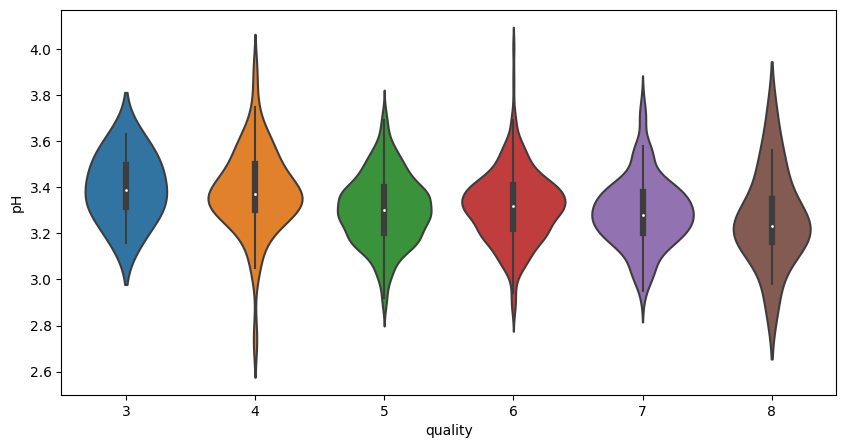

In [26]:
# pH Vs quality

plt.figure(figsize=(10,5))
sns.violinplot(x = 'quality', y = 'pH', data =df)
plt.show()

The relation is weak between pH an quality as there is no clear trend has been observed

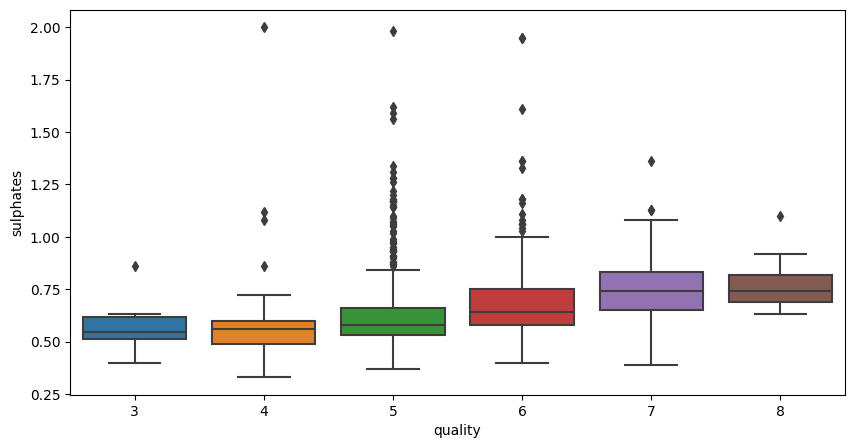

In [27]:
# sulphates Vs quality

plt.figure(figsize=(10,5))
sns.boxplot(x = 'quality', y = 'sulphates', data =df)
plt.show()

The relation is slightly strong and show a positive trend as sulphates increase quality increases

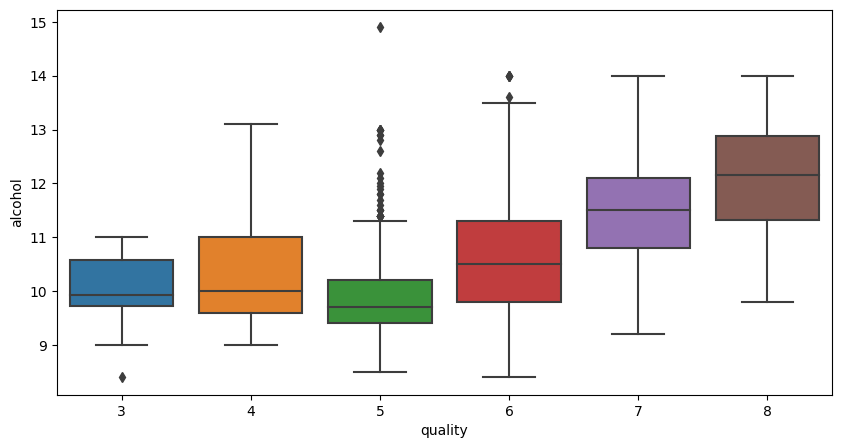

In [28]:
# alcohol Vs quality

plt.figure(figsize=(10,5))
sns.boxplot(x = 'quality', y = 'alcohol', data =df)
plt.show()

the trend is positive and strongly related between alcohol content and quality, but there is slight change at quality 5 may be bcuz of outliers

### Checking for data dsitribution

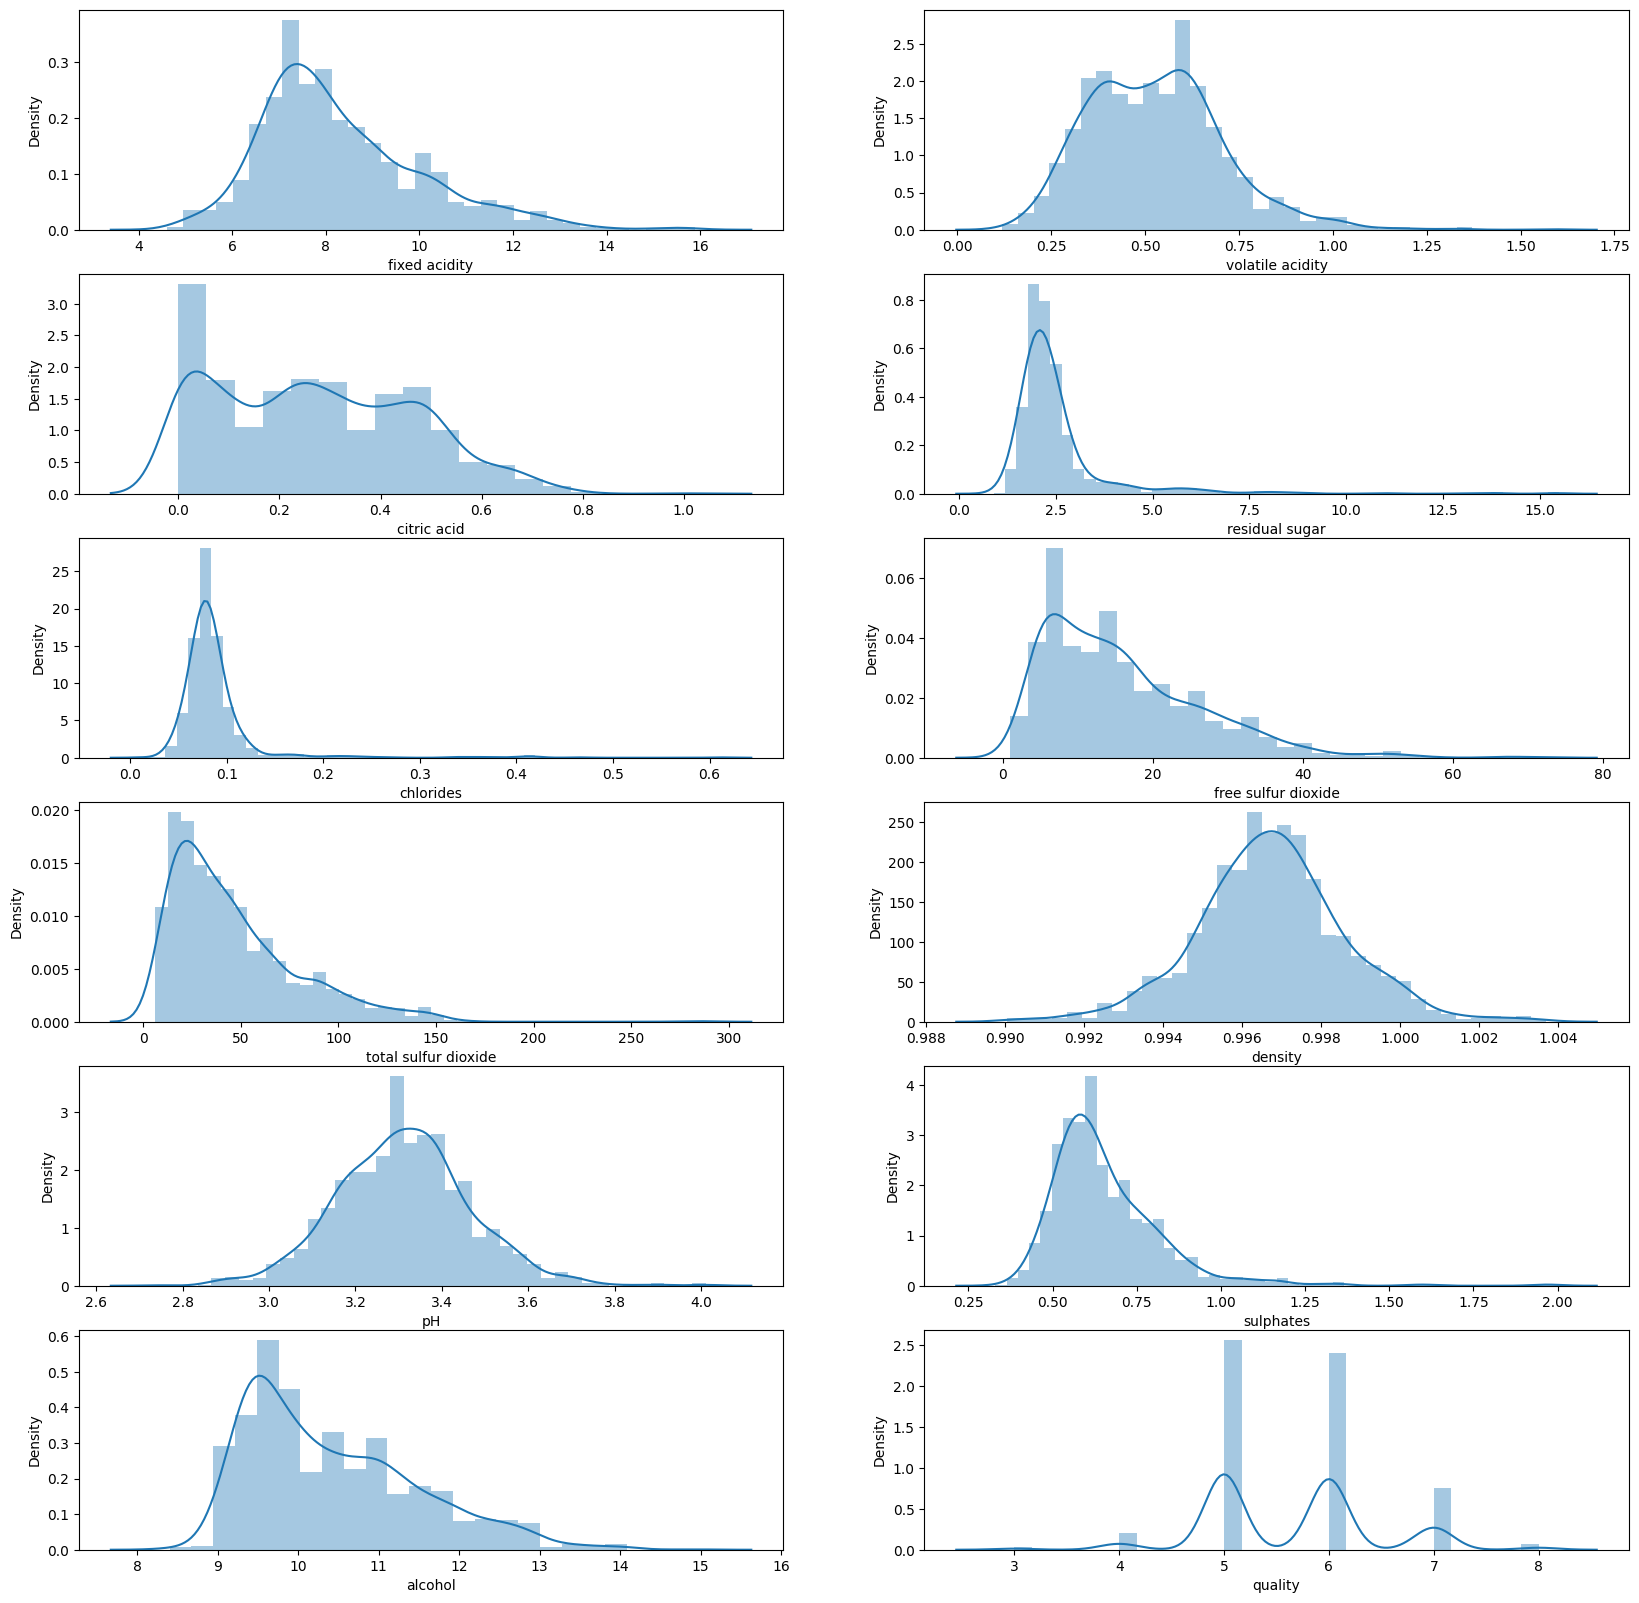

In [29]:
plt.figure(figsize=(20,20))
plotnumber = 1
for i in df:
    if plotnumber <= 12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

From the above graphs there are few almost normal distributed plots =fixed acidity,volatile acidity,pH
skewed to right = citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,sulphates	

### Check for outliers

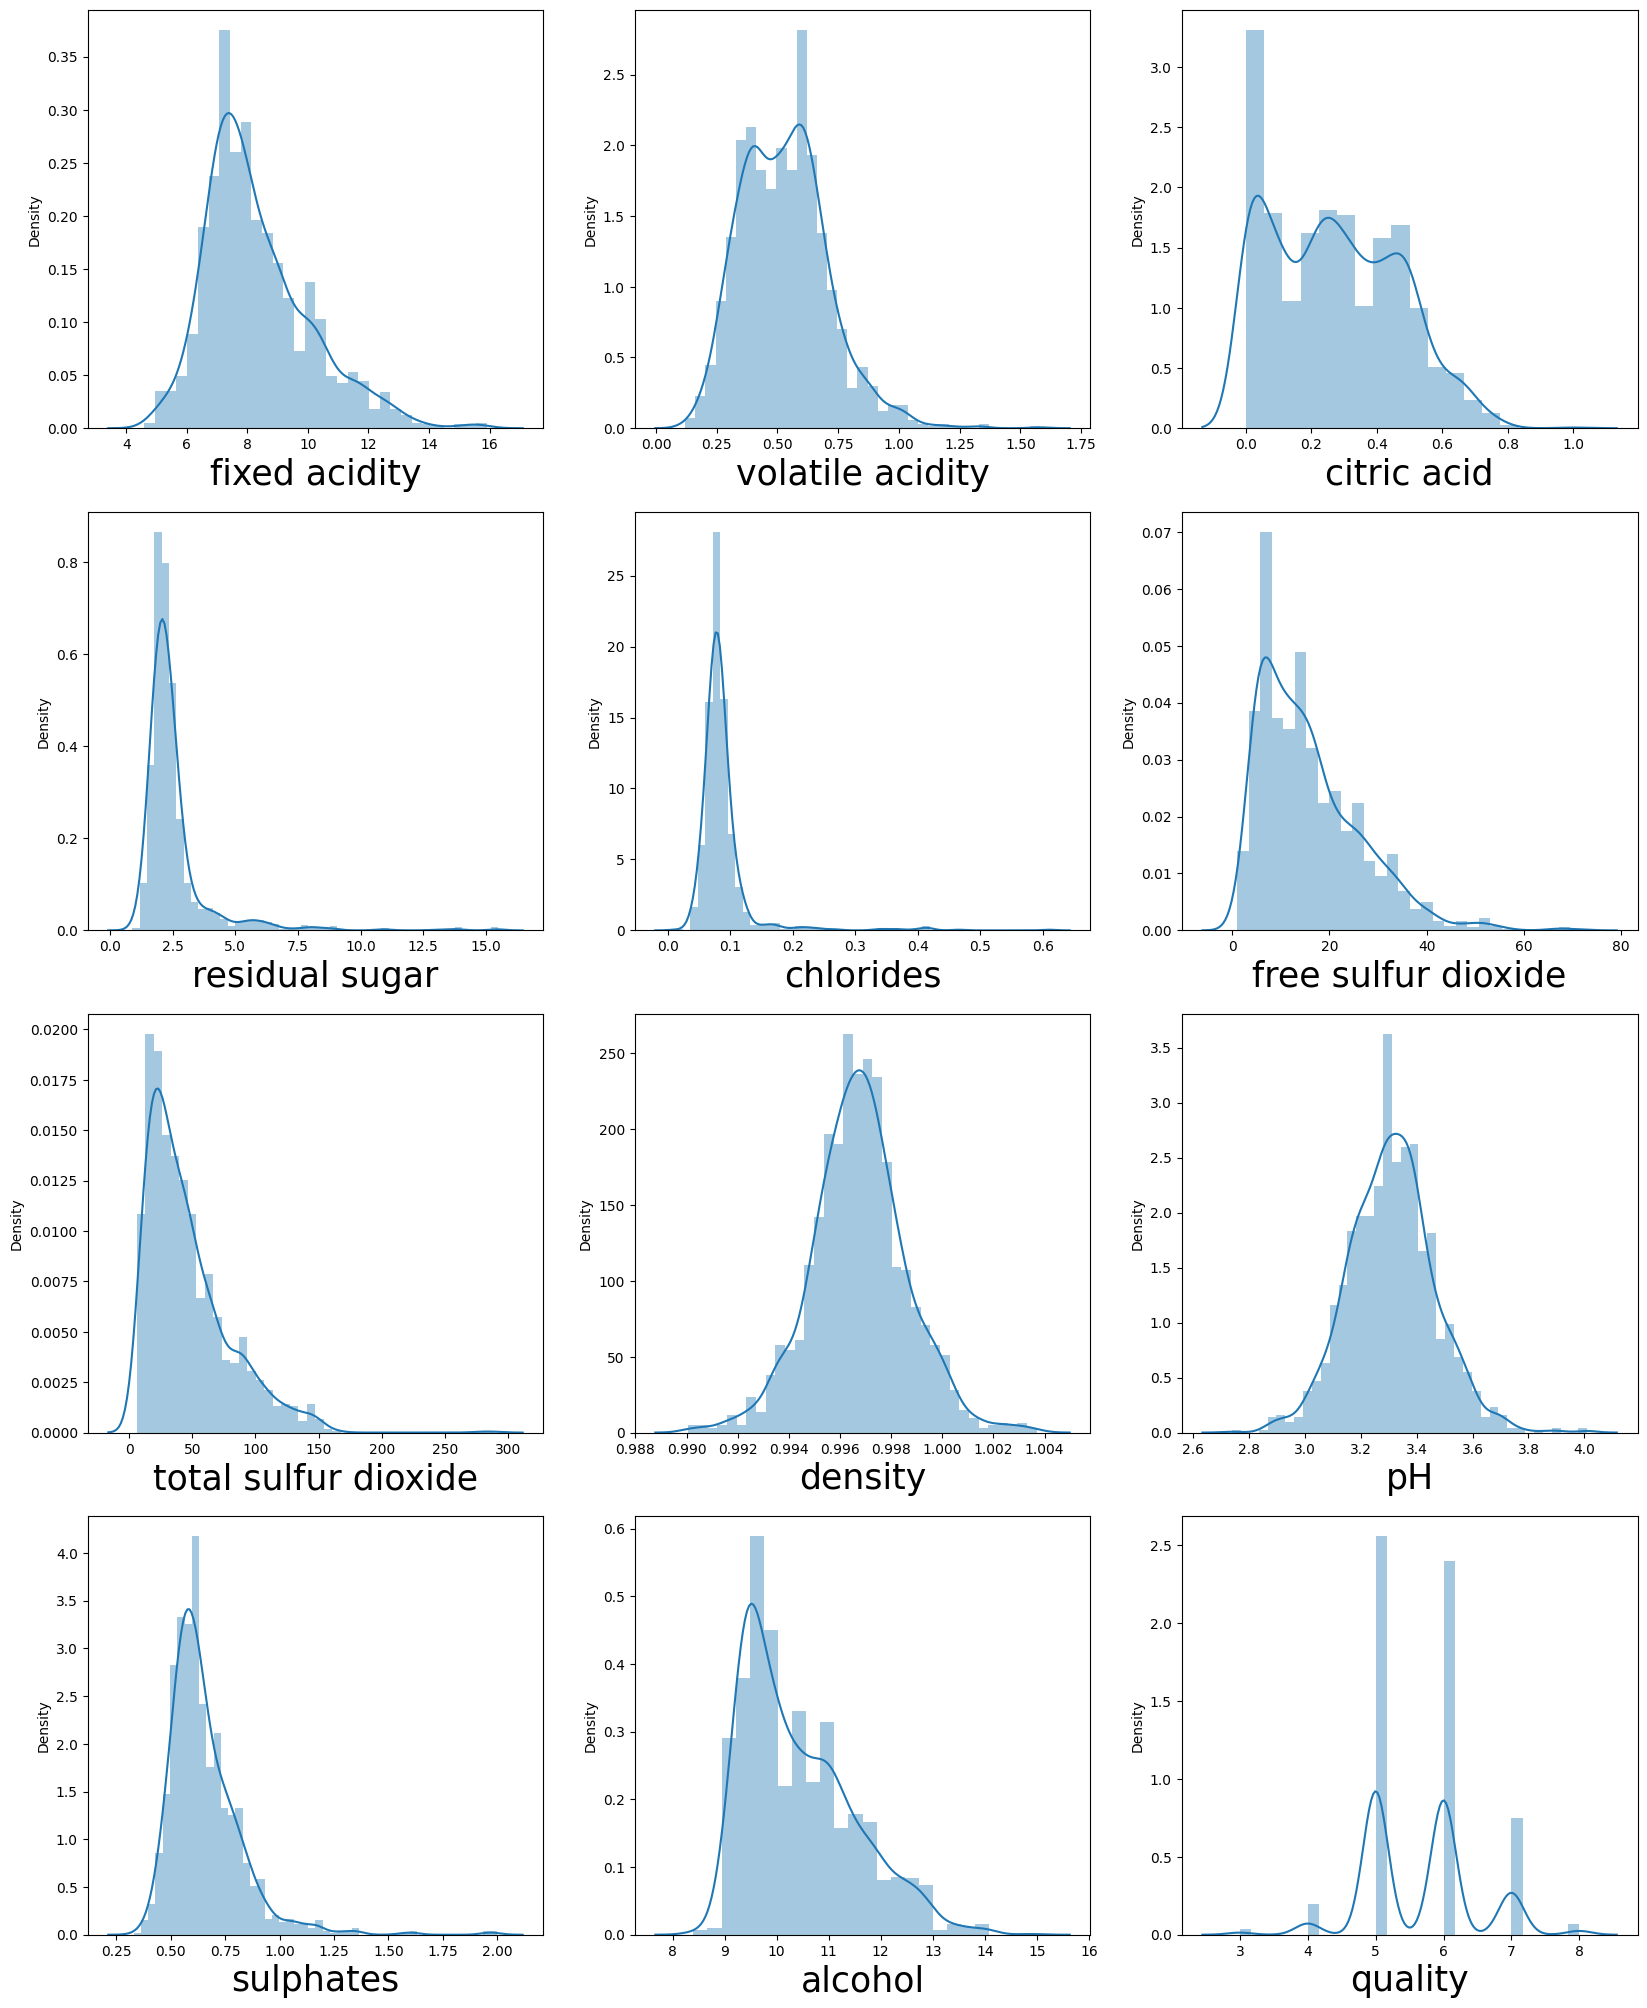

In [30]:
plt.figure(figsize=(20,25))
plotnumber = 1
for i in df:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize =25)
    plotnumber+=1
plt.show()

As we can observe from boxplot we have outlier for almost all the features

### Checking for skewness

In [31]:
skewness = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].skew()

In [32]:
skewness

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

- Fixed acidity ,volatile acidity, citric acid, alcohol are greater than 0, so positively skewed, therefore right skewed
- Desnity and pH data is approximately normal distributed 
- The highly skewed features are residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide and sulphates as the data is greater than 0, so positively skewed, so right skewed

### Removing outliers using log transform

In [33]:
def log_transform(col):
    return np.log(col)

columns_to_transform = ['fixed acidity','volatile acidity','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates','alcohol']

for column in columns_to_transform:
    df[column] = df[[column]].apply(log_transform)

In [34]:
df.shape

(1599, 12)

In [35]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.098226,-0.698517,0.270976,0.850232,-2.505462,2.546132,3.600721,0.996747,3.311113,-0.445260,2.339021,5.636023
std,0.199412,0.353683,0.194801,0.357443,0.327215,0.685292,0.705393,0.001887,0.154386,0.223566,0.098899,0.807569
min,1.526056,-2.120264,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,2.128232,3.000000
25%,1.960095,-0.941609,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,2.251292,5.000000
50%,2.066863,-0.653926,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996750,3.310000,-0.478036,2.322388,6.000000
75%,2.219203,-0.446287,0.420000,0.955511,-2.407946,3.044522,4.127134,0.997835,3.400000,-0.314711,2.406945,6.000000
max,2.766319,0.457425,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,2.701361,8.000000


- the count is uniform for all the variables
- the difference between 3rd quartile and max is reasonable
- the data is almost noramlly distributed as mean and median has slight difference

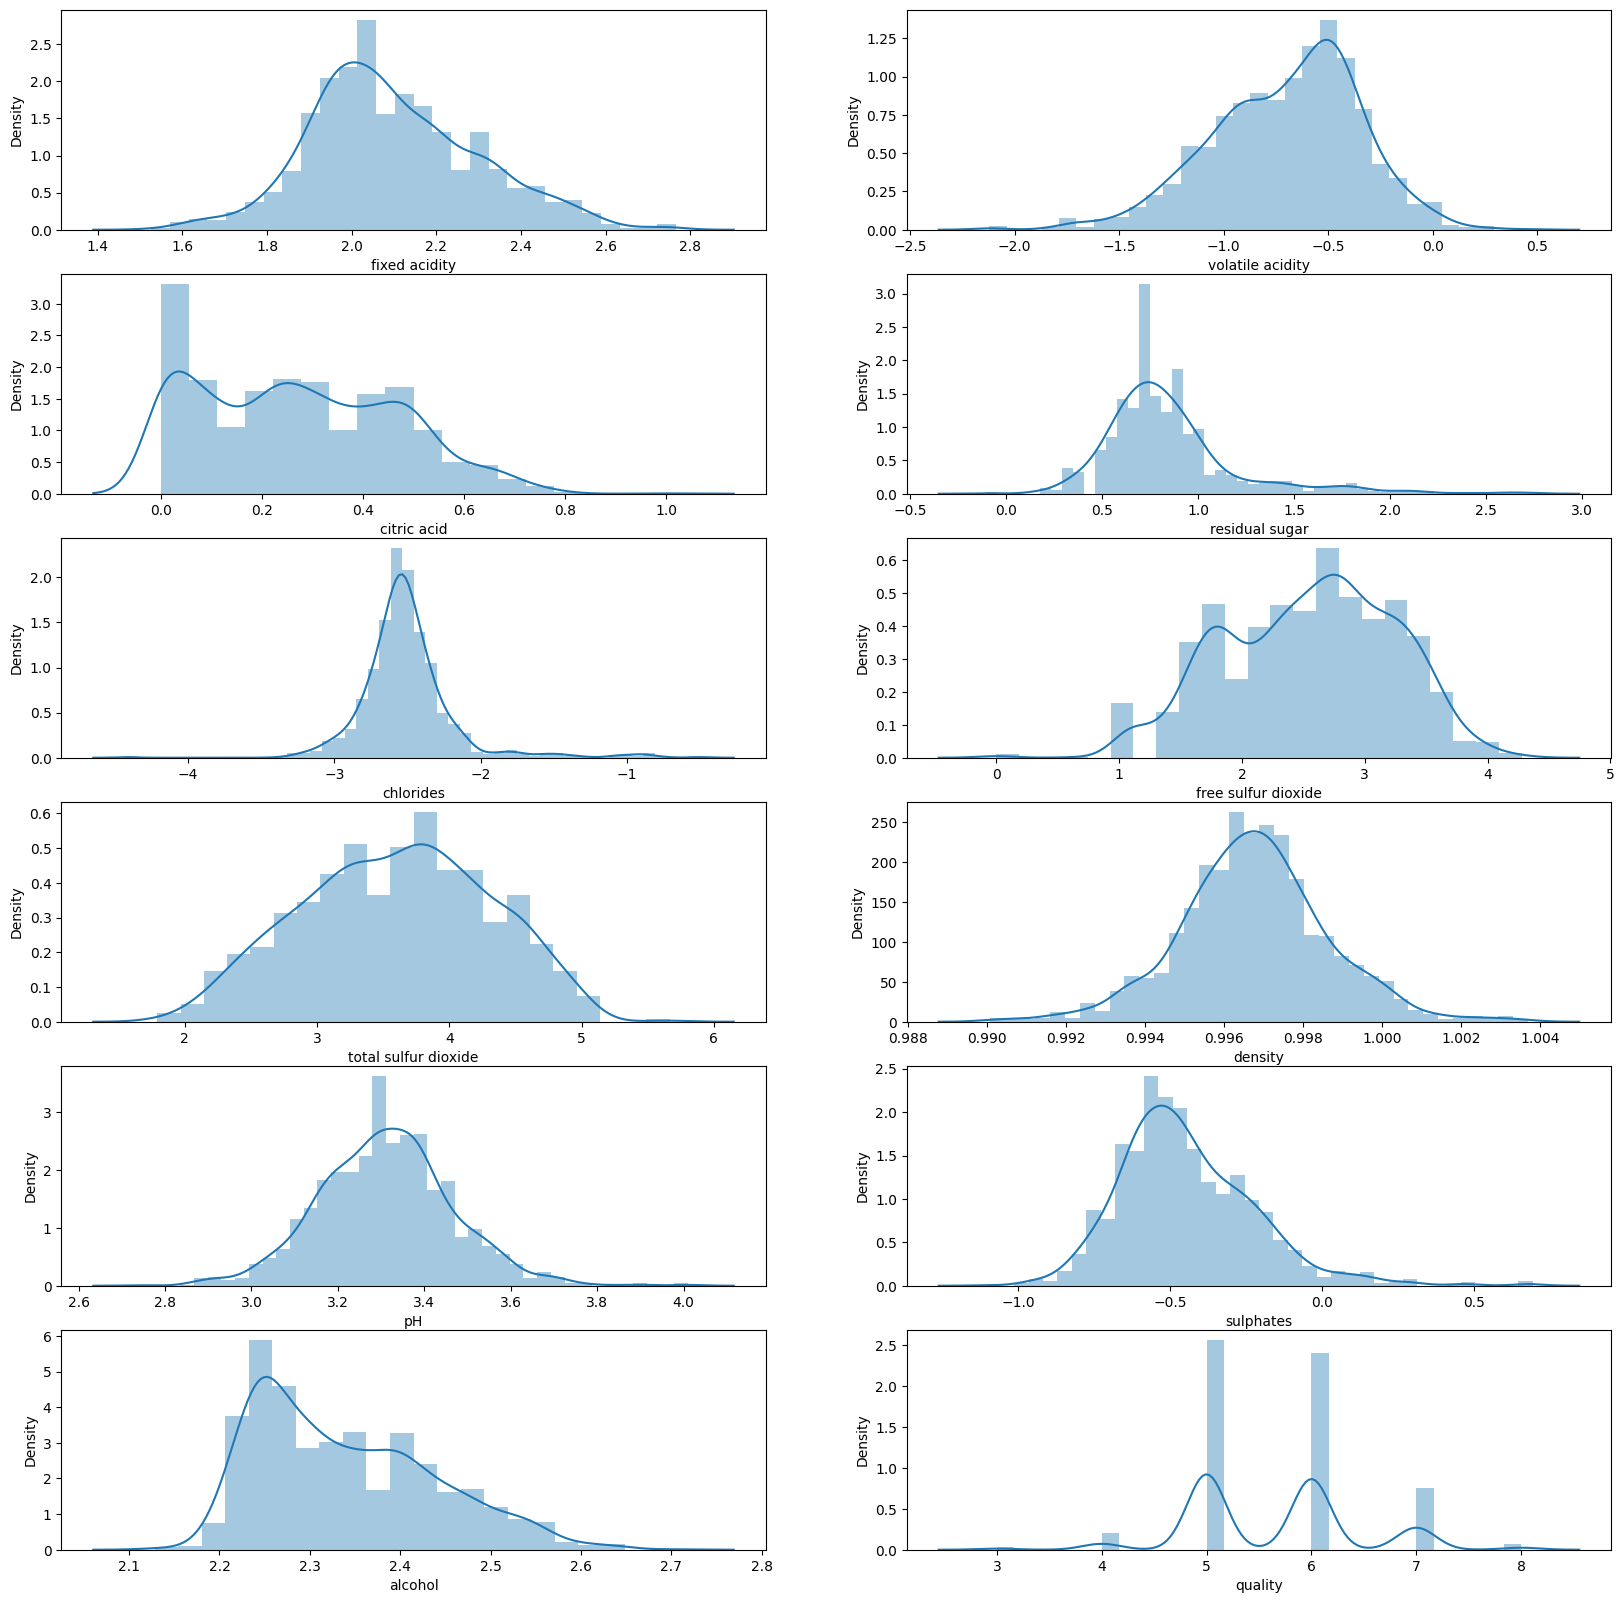

In [36]:
plt.figure(figsize=(20,20))
plotnumber = 1
for i in df:
    if plotnumber <= 12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

After removing the outliers the data is almost normally distributed

### Multicollinearity 

In [37]:
# Checking the correlation between features and the target
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.263939,0.667163,0.171170,0.198930,-0.177755,-0.113279,0.674770,-0.706360,0.197907,-0.093876,0.114238
volatile acidity,-0.263939,1.000000,-0.564957,0.037778,0.127886,0.036517,0.098941,0.045426,0.223115,-0.294738,-0.228883,-0.391249
citric acid,0.667163,-0.564957,1.000000,0.172286,0.181780,-0.089146,-0.003637,0.364947,-0.541904,0.331516,0.108961,0.226373
residual sugar,0.171170,0.037778,0.172286,1.000000,0.117102,0.093839,0.152920,0.417538,-0.091241,0.024800,0.079641,0.023533
chlorides,0.198930,0.127886,0.181780,0.117102,1.000000,-0.013597,0.073285,0.351939,-0.283629,0.243076,-0.305708,-0.176140
free sulfur dioxide,-0.177755,0.036517,-0.089146,0.093839,-0.013597,1.000000,0.784622,-0.039642,0.095763,0.054068,-0.084221,-0.050087
total sulfur dioxide,-0.113279,0.098941,-0.003637,0.152920,0.073285,0.784622,1.000000,0.105539,-0.014837,0.052191,-0.238093,-0.170143
density,0.674770,0.045426,0.364947,0.417538,0.351939,-0.039642,0.105539,1.000000,-0.341699,0.166124,-0.490948,-0.174919
pH,-0.706360,0.223115,-0.541904,-0.091241,-0.283629,0.095763,-0.014837,-0.341699,1.000000,-0.154116,0.206209,-0.057731
sulphates,0.197907,-0.294738,0.331516,0.024800,0.243076,0.054068,0.052191,0.166124,-0.154116,1.000000,0.136005,0.308642


This gives the correlation between independent variables and target variables

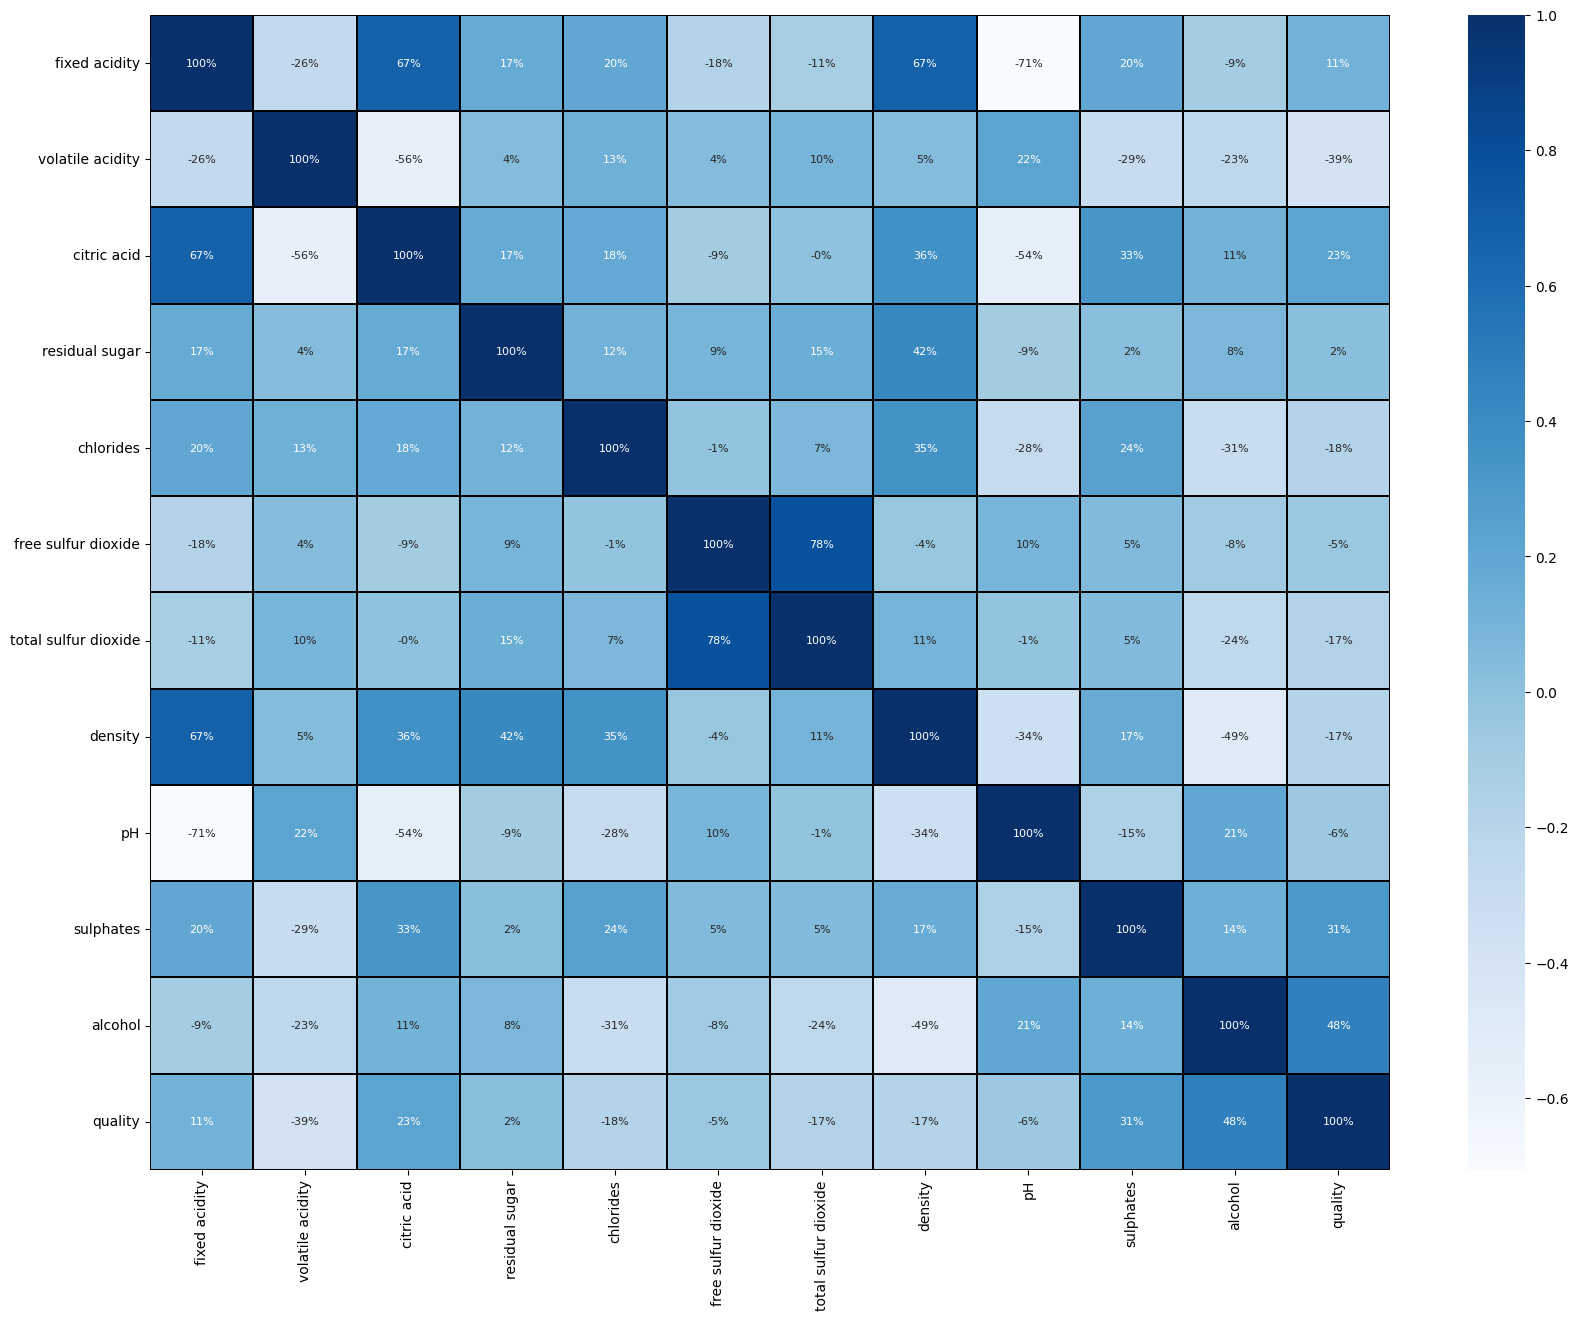

In [38]:
plt.figure(figsize = (20,15))
sns.heatmap(data=corr,annot=True,fmt='.0%',linewidths=0.1,linecolor='black',annot_kws = {'size': 8}, cmap = 'Blues',cbar = True,)
plt.show()

- We observe the percentage of correlation between features and target variable
- We can notice both positive and negative correlation between the features and target variables
- free sulphur oxide is 78% strongly related with toatl sulfur dioxides
- density and fixed acidity is 68% and so with citric acid 

In [39]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476981
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.114238
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.391249
Name: quality, dtype: float64

We observe positive and negative correlted features with the target variable

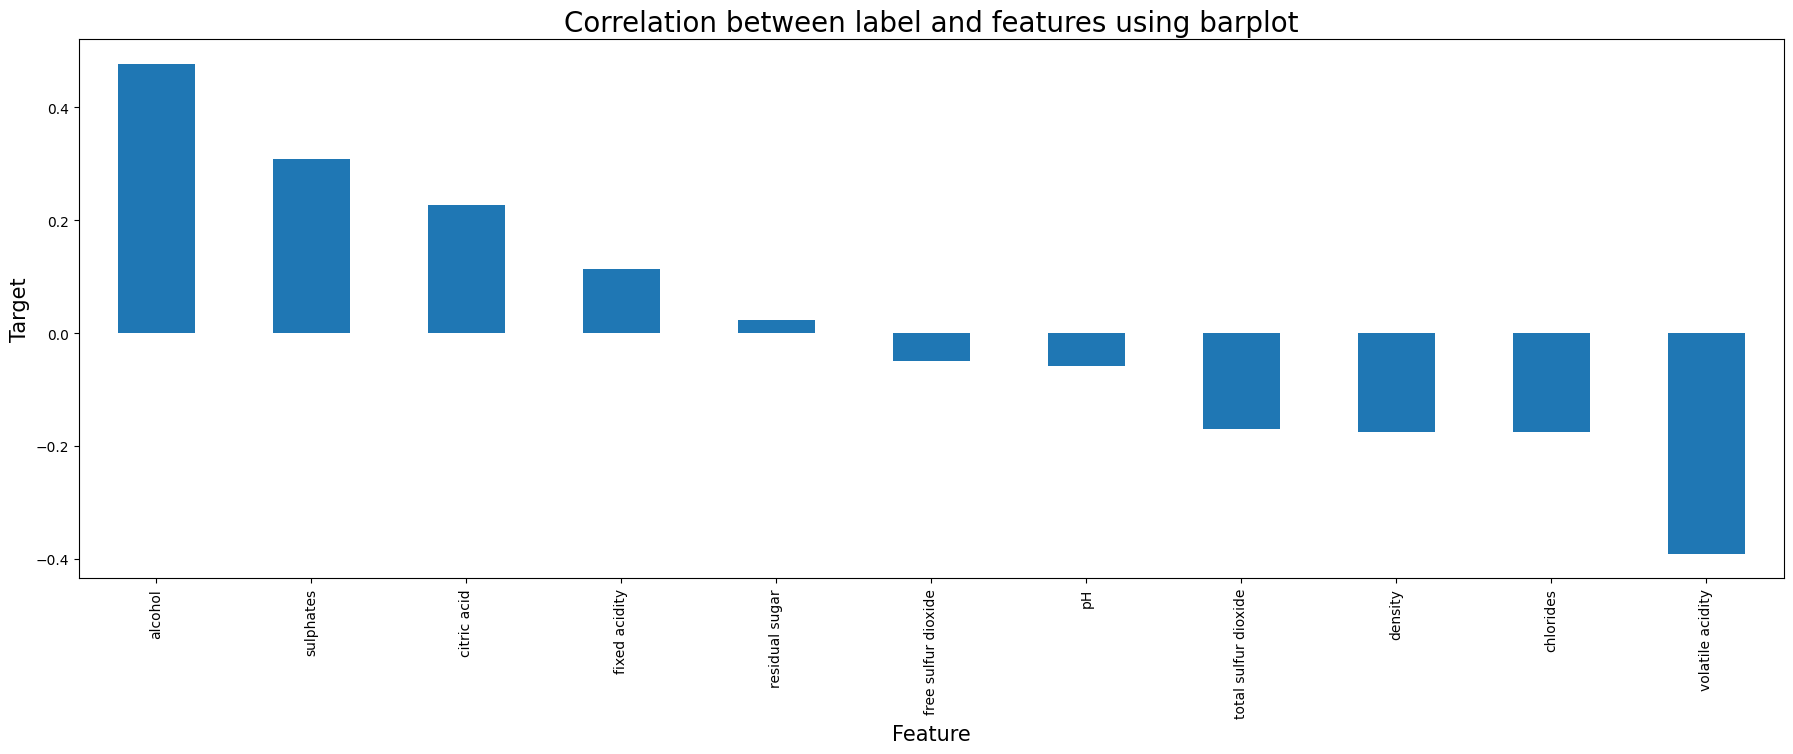

In [40]:
plt.figure(figsize = (22,7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

All the variables are positively and neagatively related but residual sugars, free shulfur dioxides have weak relation

### Separate denpendent variable from independent variables

In [41]:
X=df.drop(columns= ['quality'],axis=1)
y=df['quality']

### Standardization and Feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.485308,0.966823,-1.391472,-0.583150,-0.218763,-0.216380,-0.105451,0.558274,1.288643,-0.602062,-0.994360
1,-0.221230,1.614051,-1.391472,0.294627,0.558443,0.981997,0.856487,0.028261,-0.719933,0.266658,-0.572864
2,-0.221230,1.199415,-1.186070,-0.048478,0.365302,0.236350,0.550592,0.134264,-0.331177,0.064774,-0.572864
3,1.593621,-1.624702,1.484154,-0.583150,-0.259254,0.419050,0.700003,0.664277,-0.979104,-0.445052,-0.572864
4,-0.485308,0.966823,-1.391472,-0.583150,-0.218763,-0.216380,-0.105451,0.558274,1.288643,-0.602062,-0.994360
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.372847,0.530842,-0.980669,-0.439605,0.298111,1.342336,0.260175,-0.978765,0.899886,-0.445052,0.124960
1595,-1.621641,0.284750,-0.877968,-0.172877,-0.841175,1.631100,0.469536,-0.862162,1.353436,0.764320,0.777732
1596,-1.292584,0.071194,-0.723916,-0.048478,-0.218763,1.198644,0.125016,-0.533554,0.705508,0.705056,0.595484
1597,-1.621641,0.735385,-0.775267,-0.439605,-0.259254,1.342336,0.260175,-0.676657,1.677400,0.459825,-0.168232


### Checking for variance inflation factor

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x,i) for i in range (x.shape[1])]
vif['Features'] =x.columns

vif

,vif values,Features
0,8.010124,fixed acidity
1,1.857463,volatile acidity
2,2.992450,citric acid
3,1.943402,residual sugar
4,1.421166,chlorides
5,2.862888,free sulfur dioxide
6,3.147150,total sulfur dioxide
7,7.411696,density
8,3.511774,pH
9,1.400437,sulphates


vif values are high for fixed acidity and density

In [44]:
# Dropping Total Charges column
x.drop('fixed acidity',axis=1, inplace = True)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x,i) for i in range (x.shape[1])]
vif['Features'] =x.columns

vif

,vif values,Features
0,1.855070,volatile acidity
1,2.785993,citric acid
2,1.534419,residual sugar
3,1.376468,chlorides
4,2.828210,free sulfur dioxide
5,3.023126,total sulfur dioxide
6,2.651172,density
7,1.617714,pH
8,1.344232,sulphates
9,2.287228,alcohol


all the vif values are below 5, multicollinearity issue has been resolved

### Label Binarization

In [47]:
y = df['quality'].apply(lambda y : 1 if y>=7 else 0 )
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

We set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [48]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

the ratio between high quality wine and low qaulity wine is not proportionate

###  Oversampling the data

In [49]:
import imblearn
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [50]:
y1.value_counts()

quality
0    1382
1    1382
Name: count, dtype: int64

the ratio between high quality wine and low qaulity wine is well balanced

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [52]:
maxAccu = 0
maxRs = 0                      
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x1,y1,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9656419529837251 at random_state 107


### Create train_test_split

In [53]:
x_train, x_test,y_train,y_test = train_test_split(x1,y1,test_size =0.20, random_state=maxRS)

### Model Training

In [54]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9656419529837251
[[251  12]
 [  7 283]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       263
           1       0.96      0.98      0.97       290

    accuracy                           0.97       553
   macro avg       0.97      0.97      0.97       553
weighted avg       0.97      0.97      0.97       553



In [55]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8300180831826401
[[219  44]
 [ 50 240]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       263
           1       0.85      0.83      0.84       290

    accuracy                           0.83       553
   macro avg       0.83      0.83      0.83       553
weighted avg       0.83      0.83      0.83       553



In [56]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9005424954792043
[[235  28]
 [ 27 263]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       263
           1       0.90      0.91      0.91       290

    accuracy                           0.90       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.90      0.90      0.90       553



In [57]:
# Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.8499095840867993
[[220  43]
 [ 40 250]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       263
           1       0.85      0.86      0.86       290

    accuracy                           0.85       553
   macro avg       0.85      0.85      0.85       553
weighted avg       0.85      0.85      0.85       553



In [58]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9403254972875226
[[247  16]
 [ 17 273]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       263
           1       0.94      0.94      0.94       290

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553



In [59]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8734177215189873
[[222  41]
 [ 29 261]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       263
           1       0.86      0.90      0.88       290

    accuracy                           0.87       553
   macro avg       0.87      0.87      0.87       553
weighted avg       0.87      0.87      0.87       553



In [60]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.972875226039783
[[251  12]
 [  3 287]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       263
           1       0.96      0.99      0.97       290

    accuracy                           0.97       553
   macro avg       0.97      0.97      0.97       553
weighted avg       0.97      0.97      0.97       553



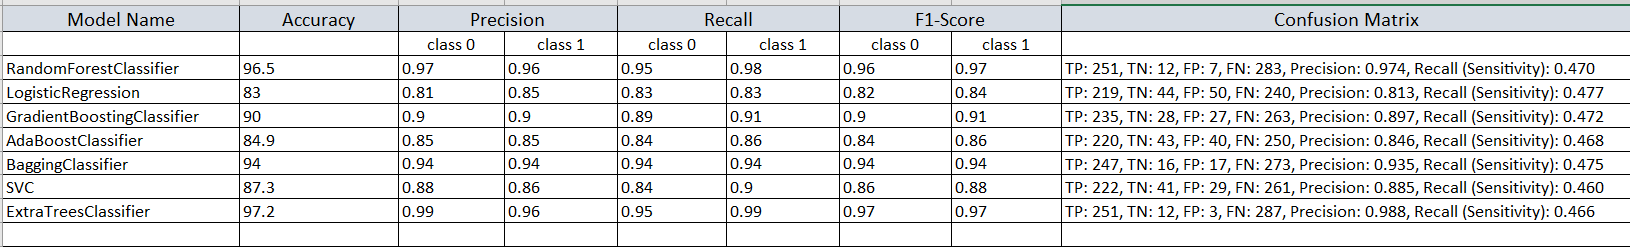

### Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
# Checking cv score for RandomForestClassifier
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score.mean())

[0.95117541 0.87703436 0.94755877 0.87522604 0.92028986]
0.9142568860235343
Difference between Accuracy score and cross validation is:  0.05138506696019085


In [63]:
# Checking cv score for LogisticRegression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score.mean())

[0.87522604 0.7920434  0.85533454 0.7323689  0.8115942 ]
0.8133134156249181
Difference between Accuracy score and cross validation is:  0.01670466755772204


In [64]:
# Checking cv score for GradientBoosingClassifier
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score.mean())

[0.91320072 0.83363472 0.90958409 0.8119349  0.86956522]
0.8675839295542103
Difference between Accuracy score and cross validation is:  0.03295856592499402


In [65]:
# Checking cv score fro AdaBoostClassifier
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score.mean())

[0.89511754 0.81012658 0.87341772 0.77938517 0.8134058 ]
0.8342905626752627
Difference between Accuracy score and cross validation is:  0.015619021411536593


In [66]:
# Checking cv score fro BaggingClassifier
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score.mean())

[0.92405063 0.86618445 0.93670886 0.87341772 0.90217391]
0.9005071153392563
Difference between Accuracy score and cross validation is:  0.03981838194826626


In [67]:
# Checking cv score fro Support Vector Machine Classifier
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score.mean())

[0.92947559 0.80650995 0.89330922 0.81735986 0.86413043]
0.8621570091988364
Difference between Accuracy score and cross validation is:  0.011260712320150912


In [68]:
# Checking cv score for ExtraTreesClassifier
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score.mean())

[0.97649186 0.88426763 0.95660036 0.88969259 0.94746377]
0.9309032418691198
Difference between Accuracy score and cross validation is:  0.04197198417066328


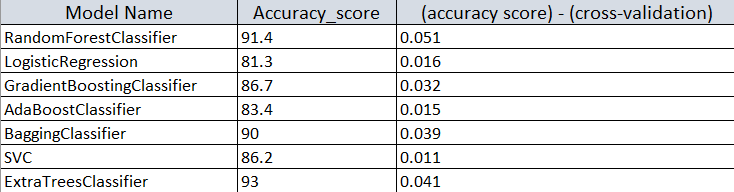

From above calculation ExtraTreesClassifier is good model with slight varaince of 4.1%

In [69]:
# ExtraTreesClassifier                                 
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],              
              'max_depth':[0,10,20],
              'n_jobs': [-2,-1,1],
              'n_estimators': [50,100,200,300]}

GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [70]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [71]:
Final_model = ExtraTreesClassifier( criterion = 'entropy', max_depth = 20,
                                    n_estimators = 200, n_jobs = -2,random_state = 10)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 97.11%


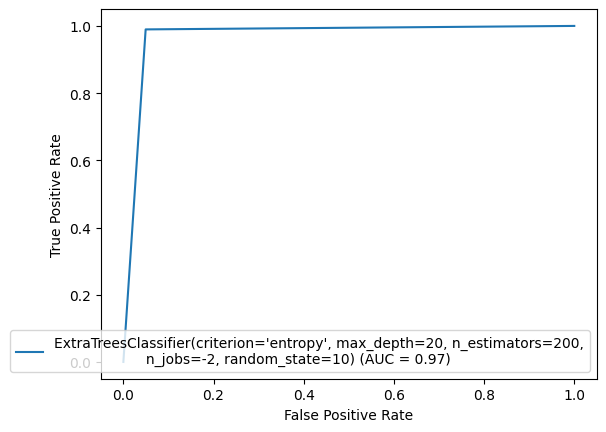

In [72]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

roc-auc value of 0.98 indicates good classification performance.

In [73]:
import pickle
with open('Red_Wine_quality_Analysis.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [74]:
with open('Red_Wine_quality_Analysis.pkl', 'rb') as file:
    model = pickle.load(file)

prediction = model.predict(x_test)

In [75]:
etc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Original'] = etc
df

,Predicted,Original
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
548,0,0
549,0,0
550,1,1
551,0,0


My model performed well on unseen data